  1%|          | 2/250 [00:00<00:46,  5.32it/s]/srv/venv/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Source Sans Pro'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
251it [02:04,  1.99it/s]                         


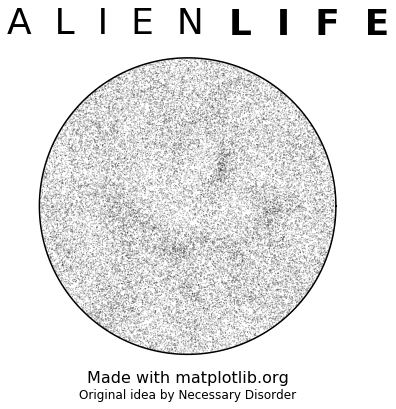

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from noise._simplex import noise4
import matplotlib.animation as animation
import tqdm


n = 40000
radius = 200
width,height = 500, 500
length = 50
scale = 0.005
time = 0

T = np.random.uniform(0, 2*np.pi, n)
R = np.sqrt(np.random.uniform(0, 1, n))
P = np.zeros((n,2))
X,Y = P[:,0], P[:,1]
X[...] = R*np.cos(T)
Y[...] = R*np.sin(T)
intensity = np.power(1.001-np.sqrt(X**2 + Y**2), 0.75)
X[...] = X*radius + width//2
Y[...] = Y*radius + height//2


def update(*args):
    global P, time, pbar

    time += 2*0.002
    P_ = np.zeros((n,2))
    cos_t = 1.5*np.cos(2*np.pi*time)
    sin_t = 1.5*np.sin(2*np.pi*time)
    for i in range(n):
        x, y = P[i]
        dx = noise4(scale*x,     scale*y, cos_t, sin_t, 2)
        dx *= intensity[i]*length
        dy = noise4(100+scale*x, 200+scale*y, cos_t, sin_t, 2)
        dy *= intensity[i]*length
        P_[i] = x + dx, y +dy
    pbar.update(1)
    scatter.set_offsets(P_)


fig = plt.figure(figsize=(5.5,5.5)) #original 5,5 was getting cutoff in gif because of missing font when run at MyBinder.prg
ax = plt.subplot(1,1,1, aspect=1, frameon=False)
scatter = plt.scatter(X, Y, s=1.5, edgecolor="none", facecolor="black", alpha=.25)

T = np.linspace(0, 2*np.pi, 200)
X = width/2  + radius*np.cos(T)
Y = height/2 + radius*np.sin(T)
plt.plot(X, Y, color="k", linewidth=1.5)


ax.set_xticks([])
ax.set_yticks([])

ax.text(0.55, 1.11, "A  L  I  E  N", size=36,
        name="Source Sans Pro", weight=100,
        ha="right", va="top", transform=ax.transAxes)
ax.text(0.55, 1.11 - 0.0025, "  L  I  F  E", size=36,
        name="Source Sans Pro", weight=600,
        ha="left", va="top", transform=ax.transAxes)
ax.text(0.5, -0.05, "Made with matplotlib.org", size=16,
        name="Source Sans Pro", weight=100,
        ha="center", va="bottom", transform=ax.transAxes)
ax.text(0.5, -0.10, "Original idea by Necessary Disorder", size=12,
        name="Source Sans Pro", weight=100,
        ha="center", va="bottom", transform=ax.transAxes)


anim = animation.FuncAnimation(fig, update, frames=250, interval=20)
pbar = tqdm.tqdm(total=250)
# anim.save('alien-life.mp4', writer='ffmpeg', fps=60)
anim.save('alien-life-binder.gif', writer='imagemagick', fps=30)
pbar.close()
plt.show()

When you run the cell above it will make a new file entitled, `alien-life-binder.gif`, that you can view on the dashboard. Alternatively, the produced gif can also be made to show up below here if you re-run this cell.
![](alien-life-binder.gif)